# Building Data

This notebook discusses how to *build* a series or data frame, possibly using pieces of other series or data frames, to either make new columns for our data or set up a new data frame.

We are going to use the [HETREC MovieLens data](https://grouplens.org/datasets/hetrec-2011/) again.

## Setup and Data Load

Load our Python modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the movie data:

In [2]:
movies = pd.read_table('hetrec2011-ml/movies.dat', sep='\t', encoding='latin1', na_values=['\\N'])
movies.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,...,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,...,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,...,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,...,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,...,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...


And the ratings:

In [3]:
ratings = pd.read_table('hetrec2011-ml/user_ratedmovies-timestamps.dat', sep='\t')
ratings.head()

,userID,movieID,rating,timestamp
0,75,3,1.0,1162160236000
1,75,32,4.5,1162160624000
2,75,110,4.0,1162161008000
3,75,160,2.0,1162160212000
4,75,163,4.0,1162160970000


We're also going to use genres:

In [4]:
movie_genres = pd.read_table('hetrec2011-ml/movie_genres.dat', sep='\t')
movie_genres.head()

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [5]:
movie_genres['genre'].value_counts()

Drama          5076
Comedy         3566
Thriller       1664
Romance        1644
Action         1445
Crime          1086
Adventure      1003
Horror          978
Sci-Fi          740
Fantasy         535
Children        519
Mystery         497
War             494
Documentary     430
Musical         421
Animation       279
Western         261
Film-Noir       145
IMAX             25
Short             1
Name: genre, dtype: int64

## Creating Arrays

Let's start with how to build a NumPy array, before we even get to series and frames.

NumPy gives us several ways to create arrays.  We can use [`np.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) to create one from a list, array, data series, or anything else that NumPy thinks looks like an array (the NumPy and Pandas documentation call such objects “array-like”).

So let's make an array:

In [6]:
np.array([0, 2, 5, 9, -3])

array([ 0,  2,  5,  9, -3])

We can also create an array from a range, with [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html):

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Another super useful way to make an array is [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), which creates an array consisting of evenly-spaced points between two other values, including both of the endpoints:

In [8]:
np.linspace(0, 5, 10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

Because it's creating 10 points **including** 0 and 5, it doesn't include many integer values.  Creating 11 points would fix that:

In [9]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

We can also randomly generate arrays.  There are a lot of RNG features in NumPy (see [the documentation](https://numpy.org/doc/stable/reference/random/index.html)); we'll start with generating 100 “standard normal” values (normally distributed with mean 0 and variance 1):

In [10]:
rng = np.random.default_rng()
rng.standard_normal(100)

array([-0.33873561,  0.51678273,  0.14711789,  0.19838675,  0.54761942,
        0.19131156, -0.4752898 ,  0.02024525, -1.33948309,  0.32448087,
       -0.19374478,  0.8344856 , -1.2166371 , -0.37482094,  0.86518527,
        2.18446418,  0.6075668 , -2.31585428, -0.74720259,  1.19992932,
        0.99405759,  2.23903908,  1.81167178,  1.00598331,  0.55223142,
        0.67745515,  0.58957695, -0.46088752,  0.33887571, -0.27662875,
       -1.32340716,  0.13839638, -0.57016739, -0.58275332,  1.09105615,
       -0.61806743,  2.12021099,  1.24762095, -0.91650255, -0.50467559,
       -1.01163067,  0.28069416, -0.35173081, -0.89731573,  1.08407209,
       -1.69627407,  0.07576669, -0.08138856,  1.46850213,  0.36764678,
        0.0687904 ,  1.61086781, -0.90819236, -0.60426599,  0.81166916,
        0.29945399, -0.56891978, -1.67152667, -0.69264555, -0.45211381,
        0.30505253,  0.11921514, -1.26780228, -0.017003  ,  0.91574513,
       -0.26769486, -0.72651488,  0.04675951, -0.53645195, -0.03

## Creating Series

Now let's look at creating pandas `Series` objects.

### From an Array-Like

The `Series` constructor takes an array-like:

In [11]:
pd.Series(np.arange(5))

0    0
1    1
2    2
3    3
4    4
dtype: int32

This series has no name, no index name, and it has the integer values 0 through 4.  Since it has no specified index, it uses a `RangeIndex`, which indexes, again from 0 to 4.

We can specify an index as an array-like:

In [12]:
abc = pd.Series([1, 3, 14], index=['apple', 'banana', 'carrot'])
abc

apple      1
banana     3
carrot    14
dtype: int64

Now we have the values 1, 3, and 14 in a series, associated with index keys ‘apple’, ‘banana’, and ‘carrot’ respectively.  We can look up values like we've seen:

In [13]:
abc.loc['banana']

3

### From a Single Value

The constructor can also take a single value, and create a series with that value for every element.  For this use case, we must provide an index.

For example:

In [14]:
pd.Series(0, index=['a', 'b', 'c', 'd'])

a    0
b    0
c    0
d    0
dtype: int64

### Building Up

With this, we can then assign other values at particular places:

In [15]:
s = pd.Series(0, index=['a', 'b', 'c', 'd'])
s

a    0
b    0
c    0
d    0
dtype: int64

In [16]:
s.loc['b'] = 7
s

a    0
b    7
c    0
d    0
dtype: int64

We can do this with boolean masks, too — suppose we want to create a series that indicates if its index keys are odd or even:

In [17]:
s = pd.Series('odd', index=np.arange(10))
s[s.index.values % 2 == 0] = 'even'
s

0    even
1     odd
2    even
3     odd
4    even
5     odd
6    even
7     odd
8    even
9     odd
dtype: object

### Example: Ordinal

Our `movies` frame has a `year` column, indicating the year.

Certain sci-fi movies were era-defining: they had an unmistakable influence on the movies after them.  Let's, for sake of an argument, define the eras as follows:

1. Vintage (movies through 1977, when *Star Wars* came out)
2. Star Wars (1978–1999)
3. Post-Matrix (after 1999)

We can do that with the following steps:

1. Create a `Series` with the index matching the movie frame, and one of the values.
2. Use masks based on conditions selecting the other items to fill in the othe values
3. (if wanted) Set up the categorical data type with a specified order.

Let's start by finding the sci-fi movies - all movies with `Sci-Fi` as one of their genres:

In [18]:
scifi_ids = movie_genres.loc[movie_genres['genre'] == 'Sci-Fi', 'movieID']
scifi = movies.set_index('id').loc[scifi_ids]
scifi

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
24,Powder,114168,Powder - pura energía,http://ia.media-imdb.com/images/M/MV5BMTIwMTQ3...,1995,powder,5.2,19.0,9.0,10.0,47.0,4.9,5.0,0.0,5.0,0.0,3.1,6650.0,67.0,http://content7.flixster.com/movie/25/59/25590...
29,La cité des enfants perdus,112682,La ciudad de los niños perdidos,http://ia.media-imdb.com/images/M/MV5BMTI4MDc0...,1995,city_of_lost_children,7.0,33.0,27.0,6.0,81.0,7.2,7.0,5.0,2.0,71.0,4.0,22420.0,89.0,http://content6.flixster.com/movie/26/78/26782...
32,Twelve Monkeys,114746,Twelve monkeys: doce monos,http://ia.media-imdb.com/images/M/MV5BMTQwNzg2...,1995,prem-no-public-issue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content6.flixster.com/movie/10/93/02/10...
66,Lawnmower Man 2: Beyond Cyberspace,116839,El cortador de césped II: más allá del ciberes...,http://ia.media-imdb.com/images/M/MV5BMTg1MjM3...,1996,lawnmower_man_2_jobes_war,2.8,9.0,1.0,8.0,11.0,0.0,3.0,1.0,2.0,33.0,2.1,952.0,18.0,http://content7.flixster.com/movie/10/86/80/10...
76,Screamers,114367,Asesinos cibernéticos,http://ia.media-imdb.com/images/M/MV5BMTY5NTQz...,1995,1069696-screamers,4.7,30.0,9.0,21.0,30.0,4.9,9.0,2.0,7.0,22.0,3.0,2070.0,45.0,http://content7.flixster.com/movie/27/23/27230...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63617,Christmas on Mars,363240,Christmas on Mars,http://ia.media-imdb.com/images/M/MV5BMTYzNjQ3...,2008,christmas_on_mars,5.5,6.0,3.0,3.0,50.0,0.0,4.0,2.0,2.0,50.0,3.3,530.0,56.0,http://content6.flixster.com/movie/10/88/98/10...
63676,Tanin no kao,61065,Tanin no kao,http://ia.media-imdb.com/images/M/MV5BMTk3OTkz...,1966,face_of_another,7.4,6.0,6.0,0.0,100.0,0.0,1.0,1.0,0.0,100.0,4.1,598.0,90.0,http://content8.flixster.com/movie/93/50/55/93...
63989,The Devil-Doll,27521,Muñecos infernales,http://ia.media-imdb.com/images/M/MV5BMTU5MTk0...,1936,the-devildoll-the-witch-of-timbuctoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,http://content6.flixster.com/movie/10/87/02/10...


And start making eras:

In [19]:
era = pd.Series('Vintage', index=scifi.index)
era

id
24       Vintage
29       Vintage
32       Vintage
66       Vintage
76       Vintage
          ...   
63617    Vintage
63676    Vintage
63989    Vintage
64497    Vintage
64508    Vintage
Length: 740, dtype: object

Set Star Wars for after 1977 (we won't bother with the end condition, because we'll override those values in the next step):

In [20]:
era[scifi.year > 1977] = 'Star Wars'
era

id
24       Star Wars
29       Star Wars
32       Star Wars
66       Star Wars
76       Star Wars
           ...    
63617    Star Wars
63676      Vintage
63989      Vintage
64497      Vintage
64508    Star Wars
Length: 740, dtype: object

And then set 'Post-Matrix' for after 1999:

In [21]:
era[scifi.year > 1999] = 'Post-Matrix'
era

id
24         Star Wars
29         Star Wars
32         Star Wars
66         Star Wars
76         Star Wars
            ...     
63617    Post-Matrix
63676        Vintage
63989        Vintage
64497        Vintage
64508    Post-Matrix
Length: 740, dtype: object

Now we can add this as a column in our data frame:

In [22]:
scifi['era'] = era

How many sci-fi movies do we have from each era?

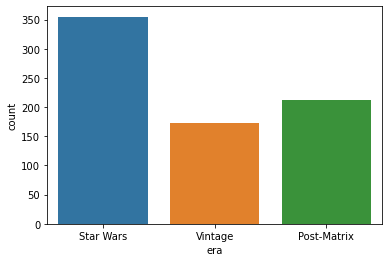

In [23]:
sns.countplot(scifi['era'])

But this era is in the wrong order!  That's no good.  We can fix that by making the `era` an *ordered categorical*.  We often leave categorical variables as strings, unless we have a very large number of data points, but we don't get control over their order.

Let's make it a categorical variable:

In [24]:
era = era.astype('category')

And set the category order:

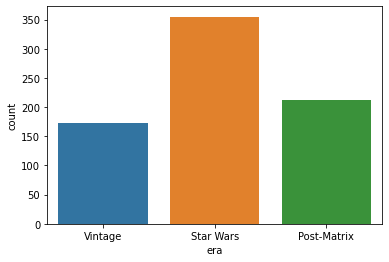

In [25]:
era = era.cat.reorder_categories(['Vintage', 'Star Wars', 'Post-Matrix'])
scifi['era'] = era
sns.countplot(scifi['era'])

## Creating Data Frames

In this section, we're going to see how to create data frames!

### From One Series

We can create a data frame from *one* series by using the [`to_frame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html) method, as seen in [Reshaping](Reshaping.ipynb).

Let's get a series:

In [26]:
id_s = movies['id']
id_s

0            1
1            2
2            3
3            4
4            5
         ...  
10192    65088
10193    65091
10194    65126
10195    65130
10196    65133
Name: id, Length: 10197, dtype: int64

And convert it to a frame:

In [27]:
mids = id_s.to_frame('movieID')
mids

,movieID
0,1
1,2
2,3
3,4
4,5
...,...
10192,65088
10193,65091
10194,65126
10195,65130


This **preserves the index**.

### From Multiple Series

If we have multiple series, with the same or compatible indexes, we can create a data frame from a *dictionary* mapping column names to series:

In [28]:
titles = pd.DataFrame({
    'movieID': movies['id'],
    'title': movies['title']
})
titles

,movieID,title
0,1,Toy story
1,2,Jumanji
2,3,Grumpy Old Men
3,4,Waiting to Exhale
4,5,Father of the Bride Part II
...,...,...
10192,65088,Bedtime Stories
10193,65091,Manhattan Melodrama
10194,65126,Choke
10195,65130,Revolutionary Road


We can also use NumPy arrays or Python lists instead of Pandas series, so long as they are all the same length.

We can also provide an index (with `index=`) in the data frame constructor.

### From a List of Rows

One more way to create a data frame is from a list (or any iterable) of rows, where each row is either a tuple or a dictionary.
The [`from_records`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_records.html) function does this.

If the rows are dictionaries, their keys are used as column names; if they are tuples, you can specify a column name with `columns=['name1', 'name2']`.

One very common source of data like this is when we are reading data that comes to us in a list or file of JSON objects, or some other source of dictionaries (such as the census data, or a MongoDB connection).

For example, the [Rent the Runway data](https://cseweb.ucsd.edu/~jmcauley/datasets.html#clothing_fit) comes as a GZIP-compressed list of JSON objects, one per line.  We can read this into a list of JSON objects like this:

In [34]:
import json, gzip
with gzip.open('renttherunway_final_data.json.gz', 'r') as zf:
    rtr_records = [json.loads(line) for line in zf]

# dump first value of list
rtr_records[0]

{'fit': 'fit',
 'user_id': '420272',
 'bust size': '34d',
 'item_id': '2260466',
 'weight': '137lbs',
 'rating': '10',
 'rented for': 'vacation',
 'review_text': "An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",
 'body type': 'hourglass',
 'review_summary': 'So many compliments!',
 'category': 'romper',
 'height': '5\' 8"',
 'size': 14,
 'age': '28',
 'review_date': 'April 20, 2016'}

We can then use `from_records` to make a data frame:

In [35]:
rtr = pd.DataFrame.from_records(rtr_records)
rtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192544 non-null  object
 1   user_id         192544 non-null  object
 2   bust size       174133 non-null  object
 3   item_id         192544 non-null  object
 4   weight          162562 non-null  object
 5   rating          192462 non-null  object
 6   rented for      192534 non-null  object
 7   review_text     192544 non-null  object
 8   body type       177907 non-null  object
 9   review_summary  192544 non-null  object
 10  category        192544 non-null  object
 11  height          191867 non-null  object
 12  size            192544 non-null  int64 
 13  age             191584 non-null  object
 14  review_date     192544 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


In [36]:
rtr.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"


We would then need to go convert a lot of data types, but we have the data!

> **Note:** Pandas also provides functions to read JSON lines from a file.  But `from_records` has a lot of uses.